In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/customer_decision.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# check label correlation with features and sort by value
df.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [6]:
dummies = pd.get_dummies(df[['Geography', 'Gender']], drop_first=True)
dummies

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [7]:
df = pd.concat([df.drop(['Geography', 'Gender'],axis=1), dummies], axis=1)

In [8]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [9]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [11]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[0.672     , 0.18918919, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.564     , 0.32432432, 0.4       , ..., 1.        , 0.        ,
        1.        ],
       [0.418     , 0.08108108, 0.3       , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.694     , 0.44594595, 0.1       , ..., 1.        , 0.        ,
        1.        ]])

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(5, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

In [39]:
model.fit(X_train, y_train, batch_size=10, epochs=100, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s 319us/sample - loss: 0.5027 - accuracy: 0.7847 - val_loss: 0.4493 - val_accuracy: 0.8070
Epoch 2/100
8000/8000 [==============================] - 2s 246us/sample - loss: 0.4657 - accuracy: 0.8000 - val_loss: 0.4355 - val_accuracy: 0.8135
Epoch 3/100
8000/8000 [==============================] - 2s 237us/sample - loss: 0.4564 - accuracy: 0.8033 - val_loss: 0.4242 - val_accuracy: 0.8200
Epoch 4/100
8000/8000 [==============================] - 2s 251us/sample - loss: 0.4406 - accuracy: 0.8112 - val_loss: 0.4101 - val_accuracy: 0.8220
Epoch 5/100
8000/8000 [==============================] - 2s 259us/sample - loss: 0.4304 - accuracy: 0.8181 - val_loss: 0.4024 - val_accuracy: 0.8280
Epoch 6/100
8000/8000 [==============================] - 2s 250us/sample - loss: 0.4201 - accuracy: 0.8223 - val_loss: 0.3990 - val_accuracy: 0.8340
Epoch 7/100
8000/8000 [==============================] - 2

In [40]:
metrics = pd.DataFrame(model.history.history)

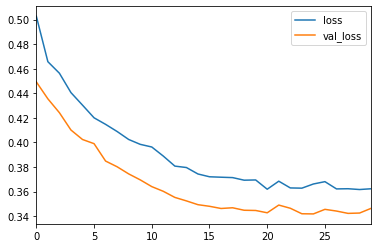

In [41]:
metrics[['loss', 'val_loss']].plot()

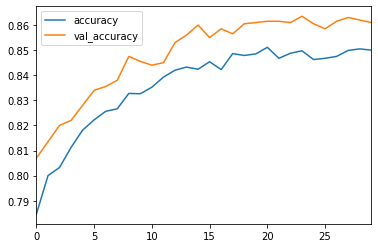

In [42]:
metrics[['accuracy', 'val_accuracy']].plot()

In [43]:
pred = model.predict_classes(X_test)

In [45]:
model.evaluate(X_test, y_test,verbose=0)

[0.3464146037101746, 0.861]

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.56       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [48]:
print(confusion_matrix(y_test, pred))

[[1542   65]
 [ 213  180]]
